In [85]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns
import numpy as np

from analysis import update_dict_from_log, update_dict_split_testname

# Fixed Radius Evaluation #

Load `df_summary`, which is the concatenation of all separate test dataframes in the `FixedRadius/dataframes` directory.

In [2]:
df_fixed = pickle.load(open('../FinalEvaluation/FixedRadius/dataframes/df_summary.pickle', 'rb'))
df_fixed.head()

,testname,cluster,step,radius,obj,bound,time,logfile,inputfile
0,mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...,0,0.05,6.80,-0.000000e+00,-0.000000e+00,48.481032,FinalEvaluation/mnist8x8_20p_retrain_vs_mnist8...,mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...
1,mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...,1,0.05,4.30,-1.421085e-14,-1.421085e-14,41.640744,FinalEvaluation/mnist8x8_20p_retrain_vs_mnist8...,mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...
2,mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...,2,0.05,3.85,-7.105427e-15,-7.105427e-15,36.557921,FinalEvaluation/mnist8x8_20p_retrain_vs_mnist8...,mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...
3,mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...,3,0.05,7.25,-2.842171e-14,-2.842171e-14,53.780616,FinalEvaluation/mnist8x8_20p_retrain_vs_mnist8...,mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...
4,mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...,4,0.05,5.70,-0.000000e+00,-0.000000e+00,42.152481,FinalEvaluation/mnist8x8_20p_retrain_vs_mnist8...,mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...


I have moved the logfiles and input files to a different directory, so I need to update the respective columns in the dataframe.

In [3]:
df_fixed['inputfile'] = 'FinalEvaluation/FixedRadius/inputs/' + df_fixed['inputfile'].astype(str)
df_fixed['logfile'] = df_fixed['logfile'].str.replace('FinalEvaluation', 'FinalEvaluation/FixedRadius/logs')
df_fixed.head()

,testname,cluster,step,radius,obj,bound,time,logfile,inputfile
0,mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...,0,0.05,6.80,-0.000000e+00,-0.000000e+00,48.481032,FinalEvaluation/FixedRadius/logs/mnist8x8_20p_...,FinalEvaluation/FixedRadius/inputs/mnist8x8_20...
1,mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...,1,0.05,4.30,-1.421085e-14,-1.421085e-14,41.640744,FinalEvaluation/FixedRadius/logs/mnist8x8_20p_...,FinalEvaluation/FixedRadius/inputs/mnist8x8_20...
2,mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...,2,0.05,3.85,-7.105427e-15,-7.105427e-15,36.557921,FinalEvaluation/FixedRadius/logs/mnist8x8_20p_...,FinalEvaluation/FixedRadius/inputs/mnist8x8_20...
3,mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...,3,0.05,7.25,-2.842171e-14,-2.842171e-14,53.780616,FinalEvaluation/FixedRadius/logs/mnist8x8_20p_...,FinalEvaluation/FixedRadius/inputs/mnist8x8_20...
4,mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...,4,0.05,5.70,-0.000000e+00,-0.000000e+00,42.152481,FinalEvaluation/FixedRadius/logs/mnist8x8_20p_...,FinalEvaluation/FixedRadius/inputs/mnist8x8_20...


Now load information about the structure of the optimization problem from the logfiles.

In [4]:
dict_list = df_fixed.to_dict('records')

for d in dict_list:
    d = update_dict_from_log(d, logfile='../' + d['logfile'])
    d = update_dict_split_testname(d)
    
df_fixed = pd.DataFrame(dict_list)

In [5]:
df_fixed.head()

,testname,cluster,step,radius,obj,bound,time,logfile,inputfile,raw_continuous,...,rows,columns,nonzeros,continuous,integer,binary,grbTime,nn1,nn2,top_k
0,mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...,0,0.05,6.80,-0.000000e+00,-0.000000e+00,48.481032,FinalEvaluation/FixedRadius/logs/mnist8x8_20p_...,FinalEvaluation/FixedRadius/inputs/mnist8x8_20...,374,...,762,467,4599,314,153,153,10.96,mnist8x8_20p_retrain,mnist8x8_20p_retrain,1
1,mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...,1,0.05,4.30,-1.421085e-14,-1.421085e-14,41.640744,FinalEvaluation/FixedRadius/logs/mnist8x8_20p_...,FinalEvaluation/FixedRadius/inputs/mnist8x8_20...,374,...,722,447,4455,304,143,143,5.40,mnist8x8_20p_retrain,mnist8x8_20p_retrain,1
2,mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...,2,0.05,3.85,-7.105427e-15,-7.105427e-15,36.557921,FinalEvaluation/FixedRadius/logs/mnist8x8_20p_...,FinalEvaluation/FixedRadius/inputs/mnist8x8_20...,374,...,697,434,4293,297,137,137,3.22,mnist8x8_20p_retrain,mnist8x8_20p_retrain,1
3,mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...,3,0.05,7.25,-2.842171e-14,-2.842171e-14,53.780616,FinalEvaluation/FixedRadius/logs/mnist8x8_20p_...,FinalEvaluation/FixedRadius/inputs/mnist8x8_20...,374,...,754,463,4579,312,151,151,15.55,mnist8x8_20p_retrain,mnist8x8_20p_retrain,1
4,mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...,4,0.05,5.70,-0.000000e+00,-0.000000e+00,42.152481,FinalEvaluation/FixedRadius/logs/mnist8x8_20p_...,FinalEvaluation/FixedRadius/inputs/mnist8x8_20...,374,...,758,465,4589,313,152,152,4.78,mnist8x8_20p_retrain,mnist8x8_20p_retrain,1


Look at correlation between numerical features contained in the dataframe.

In [6]:
# grbTime and time are >0.99 correlated, all integer variables in our models are binary, so those columns are redundant
corr = df_fixed.drop(['grbTime', 'binary', 'raw_binary'], axis=1).corr()
corr.style.background_gradient(cmap='coolwarm')

,cluster,step,radius,obj,bound,time,raw_continuous,raw_integer,rows,columns,nonzeros,continuous,integer,top_k
cluster,1,-3.68092e-19,0.0317066,-0.176453,-0.141116,-0.0392997,0,0,0.00283134,0.0104245,0.0030233,0.00981851,0.010282,2.33125e-19
step,-3.68092e-19,1,0.891607,0.514223,0.360717,0.536247,-5.83616e-18,-1.26418e-18,0.0685779,0.113381,0.029346,0.0986027,0.124713,7.59974e-18
radius,0.0317066,0.891607,1,0.663213,0.493618,0.616958,-1.82778e-17,-7.43357e-18,0.101939,0.145926,0.0369493,0.12466,0.164043,1.54168e-17
obj,-0.176453,0.514223,0.663213,1,0.62462,0.265564,-0.209815,-0.31889,-0.225812,-0.17542,-0.0785671,-0.0982565,-0.278382,-0.509626
bound,-0.141116,0.360717,0.493618,0.62462,1,0.105829,-0.0649441,-0.107187,-0.0547396,-0.0181646,-0.000869548,0.0215776,-0.078782,-0.189269
time,-0.0392997,0.536247,0.616958,0.265564,0.105829,1,0.337146,0.366901,0.388732,0.414138,0.157113,0.368145,0.442967,0.277985
raw_continuous,0,-5.83616e-18,-1.82778e-17,-0.209815,-0.0649441,0.337146,1,0.968531,0.861562,0.884643,0.0545364,0.857644,0.834129,0.379472
raw_integer,0,-1.26418e-18,-7.43357e-18,-0.31889,-0.107187,0.366901,0.968531,1,0.908417,0.920726,0.119906,0.862373,0.915749,0.597805
rows,0.00283134,0.0685779,0.101939,-0.225812,-0.0547396,0.388732,0.861562,0.908417,1,0.97308,0.362595,0.93371,0.932734,0.601898
columns,0.0104245,0.113381,0.145926,-0.17542,-0.0181646,0.414138,0.884643,0.920726,0.97308,1,0.327274,0.974353,0.935232,0.573315


In [7]:
df_plot = df_fixed.drop(['grbTime', 'binary', 'raw_binary'], axis=1)
df_plot.columns

Index(['testname', 'cluster', 'step', 'radius', 'obj', 'bound', 'time',
       'logfile', 'inputfile', 'raw_continuous', 'raw_integer', 'rows',
       'columns', 'nonzeros', 'continuous', 'integer', 'nn1', 'nn2', 'top_k'],
      dtype='object')

Look at full pairwise distribution of variables, since correlation numbers might hide interesting facts.

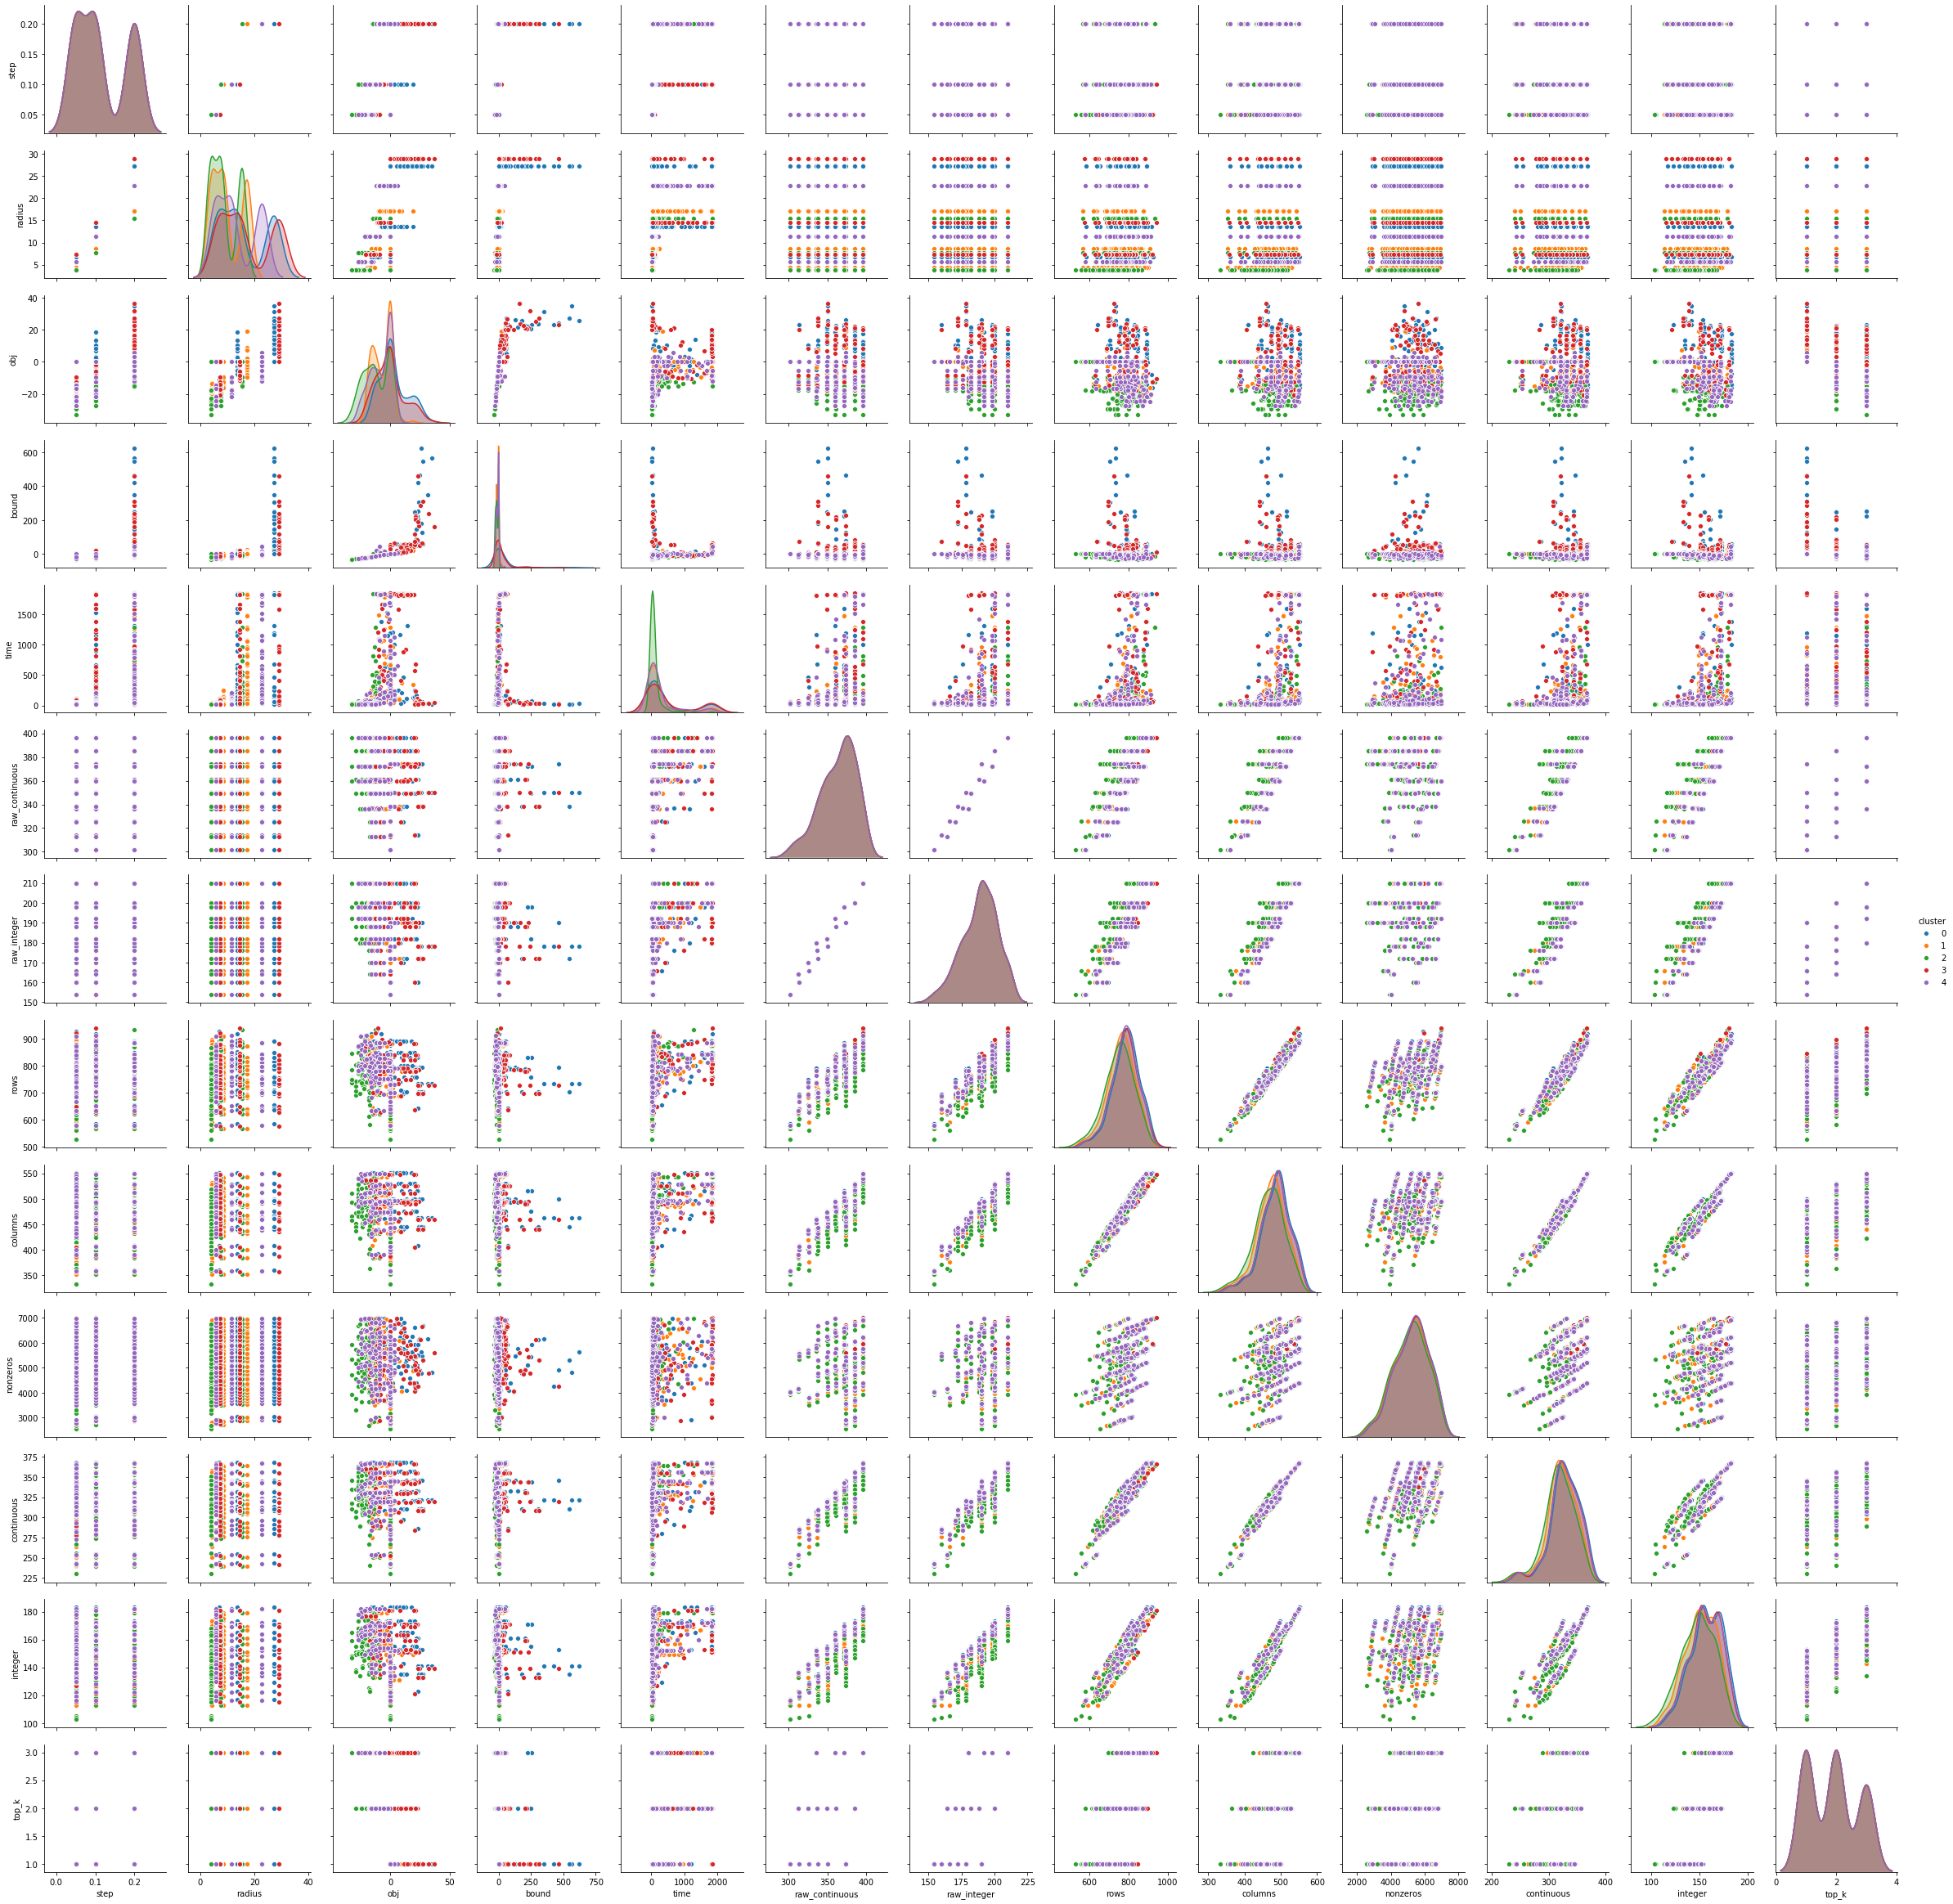

In [9]:
sns.pairplot(df_plot, vars=['step', 'radius', 'obj', 'bound', 'time', 'raw_continuous', 'raw_integer', 
                            'rows', 'columns', 'nonzeros', 'continuous', 'integer', 'top_k'], hue='cluster')

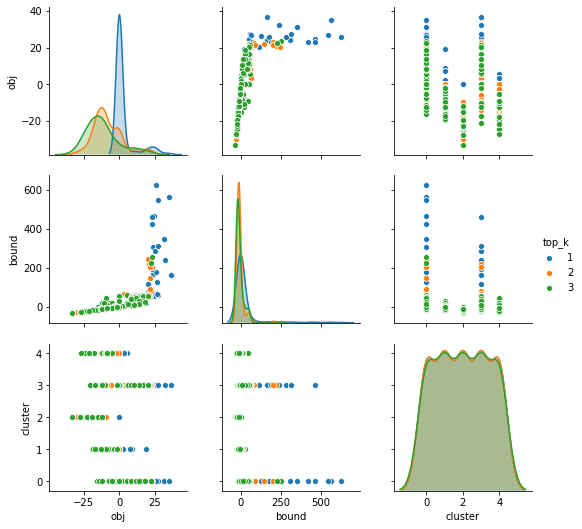

In [12]:
sns.pairplot(df_plot, vars=['obj', 'bound', 'cluster'], hue='top_k')

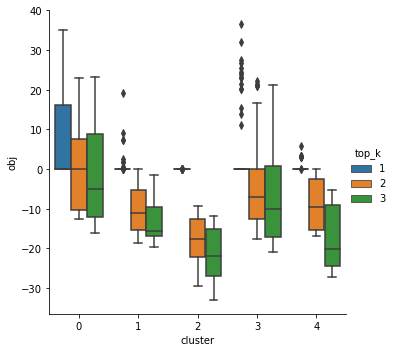

In [19]:
sns.catplot('cluster', 'obj', 'top_k', data=df_plot, kind='box')

In [118]:
extstate = 0

def custom_plot(x, y, **kwargs):
    offsets = np.linspace(-0.3, .3, 6)
    l = kwargs['label']
    if '20p' in l : offset = offsets[1]
    elif '50p' in l : offset = offsets[2]
    elif '70p' in l : offset = offsets[3]
    elif '18_18' in l : offset = offsets[4]
    elif '30_10' in l : offset = offsets[5]
    elif 'lin' in l : offset = offsets[0]
    for i in range(0, 5):
        ys = y.iloc[i::5]
        xs = x.iloc[i::5]
        plt.scatter(xs.iloc[0] + offset, ys.iloc[0], marker='v', **kwargs)
        plt.scatter(xs.iloc[1] + offset, ys.iloc[1], marker='o', **kwargs)
        plt.scatter(xs.iloc[2] + offset, ys.iloc[2], marker='^', **kwargs)
        plt.plot([-0.5, 4.5], [0,0], linestyle='--', alpha=0.7, **kwargs)



In the plot below the violation of top-k-equivalence for k=1,2,3 are shown for the chosen clusters for the comparison of the full network to the compressed networks.

Down-triangles represent a radius of 1/20, circles a radius of 1/10 and up-triangles a radius of 1/5 of the maximal cluster radius. 

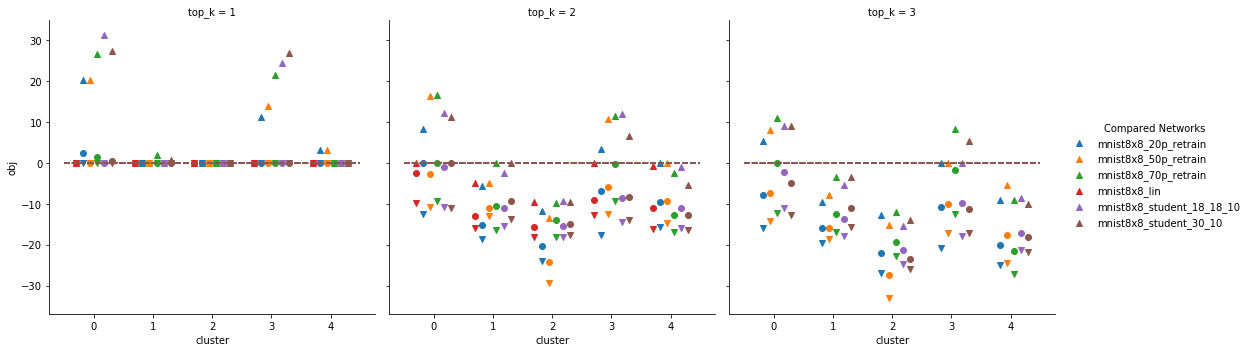

In [121]:
g = sns.FacetGrid(df_plot[(df_plot['nn1'] == 'mnist8x8_lin')], col='top_k', hue='nn2', height=5)
g.map(custom_plot, 'cluster', 'obj')
g._legend_data.update({'step 0.05' : 'v'})
g.add_legend();

g._legend.set_title('Compared Networks')

In [122]:
g.savefig('full_mnist_fixed_radius_vs_nn2.pdf')

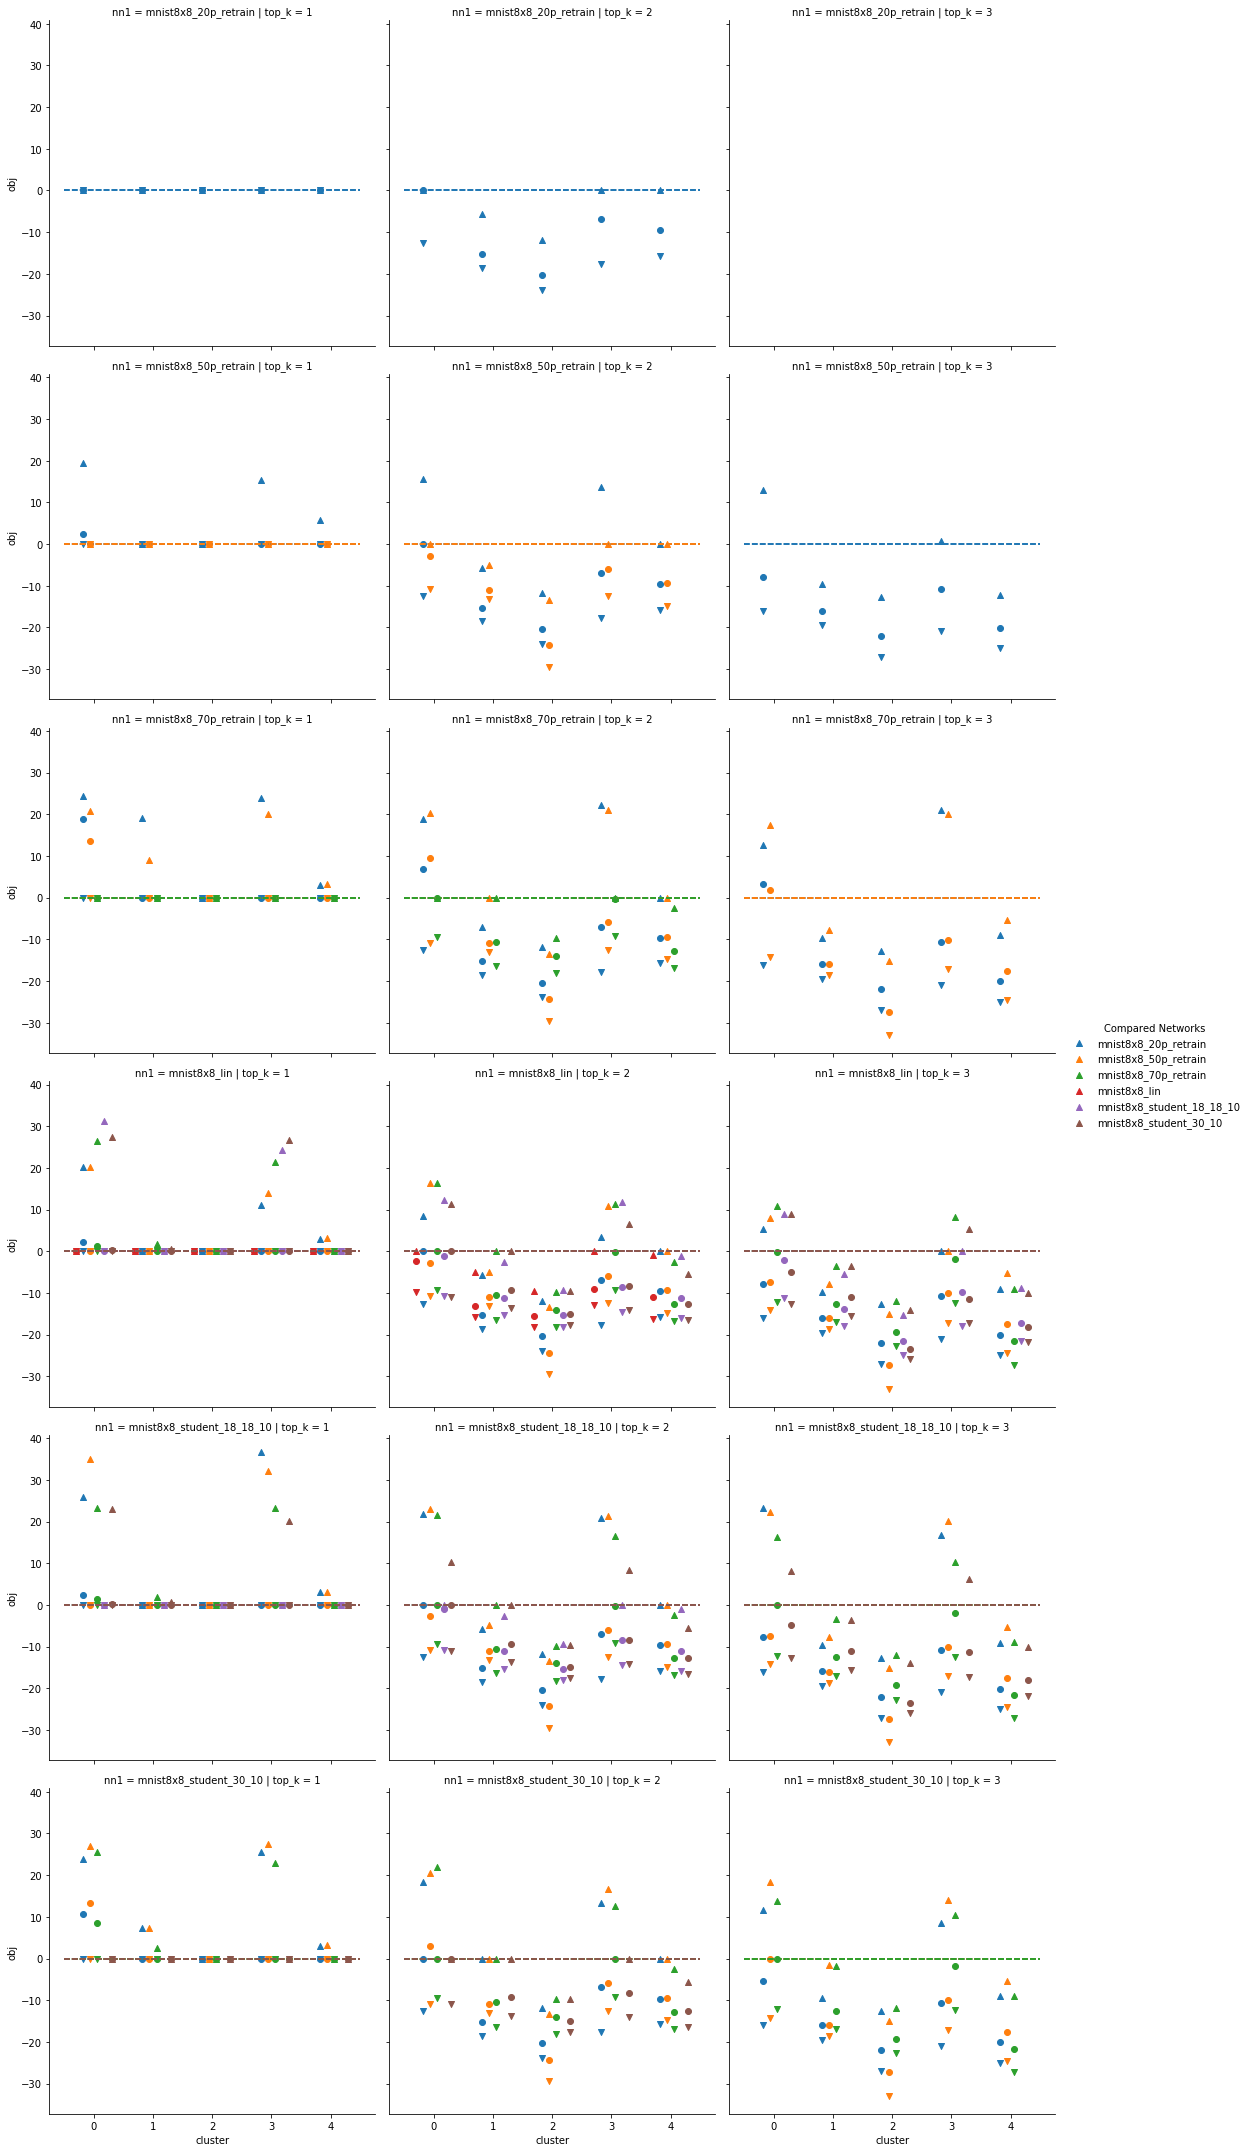

In [123]:
g2 = sns.FacetGrid(df_plot, col='top_k', row='nn1', hue='nn2', height=5)
g2.map(custom_plot, 'cluster', 'obj')
g2._legend_data.update({'step 0.05' : 'v'})
g2.add_legend();

g2._legend.set_title('Compared Networks')

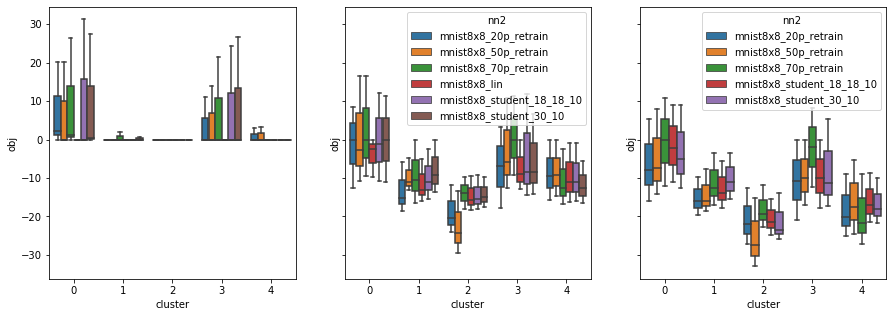

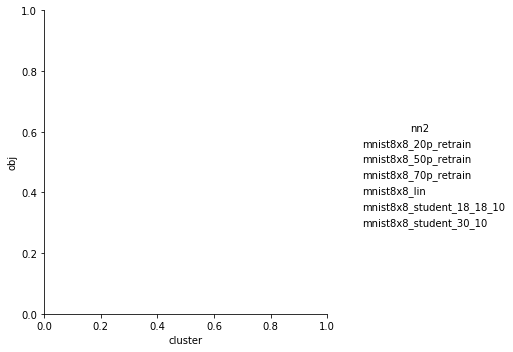

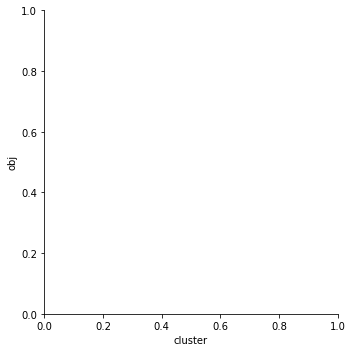

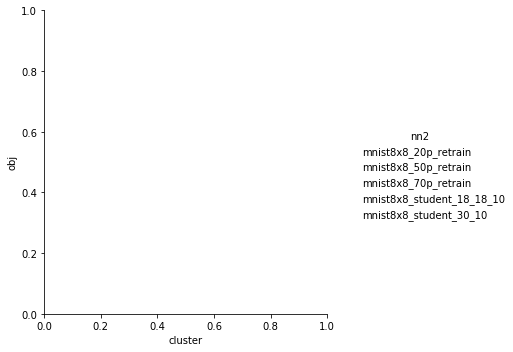

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,5))

sns.catplot('cluster', 'obj', 'nn2', data=df_plot[(df_plot['nn1'] == 'mnist8x8_lin') & (df_plot['top_k'] == 1)], 
            kind='box', ax=ax1)
ax1.legend_.remove()
sns.catplot('cluster', 'obj', 'nn2', data=df_plot[(df_plot['nn1'] == 'mnist8x8_lin') & (df_plot['top_k'] == 2)], 
            kind='box', legend=False, ax=ax2)
sns.catplot('cluster', 'obj', 'nn2', data=df_plot[(df_plot['nn1'] == 'mnist8x8_lin') & (df_plot['top_k'] == 3)], 
            kind='box', legend_out=True, ax=ax3)


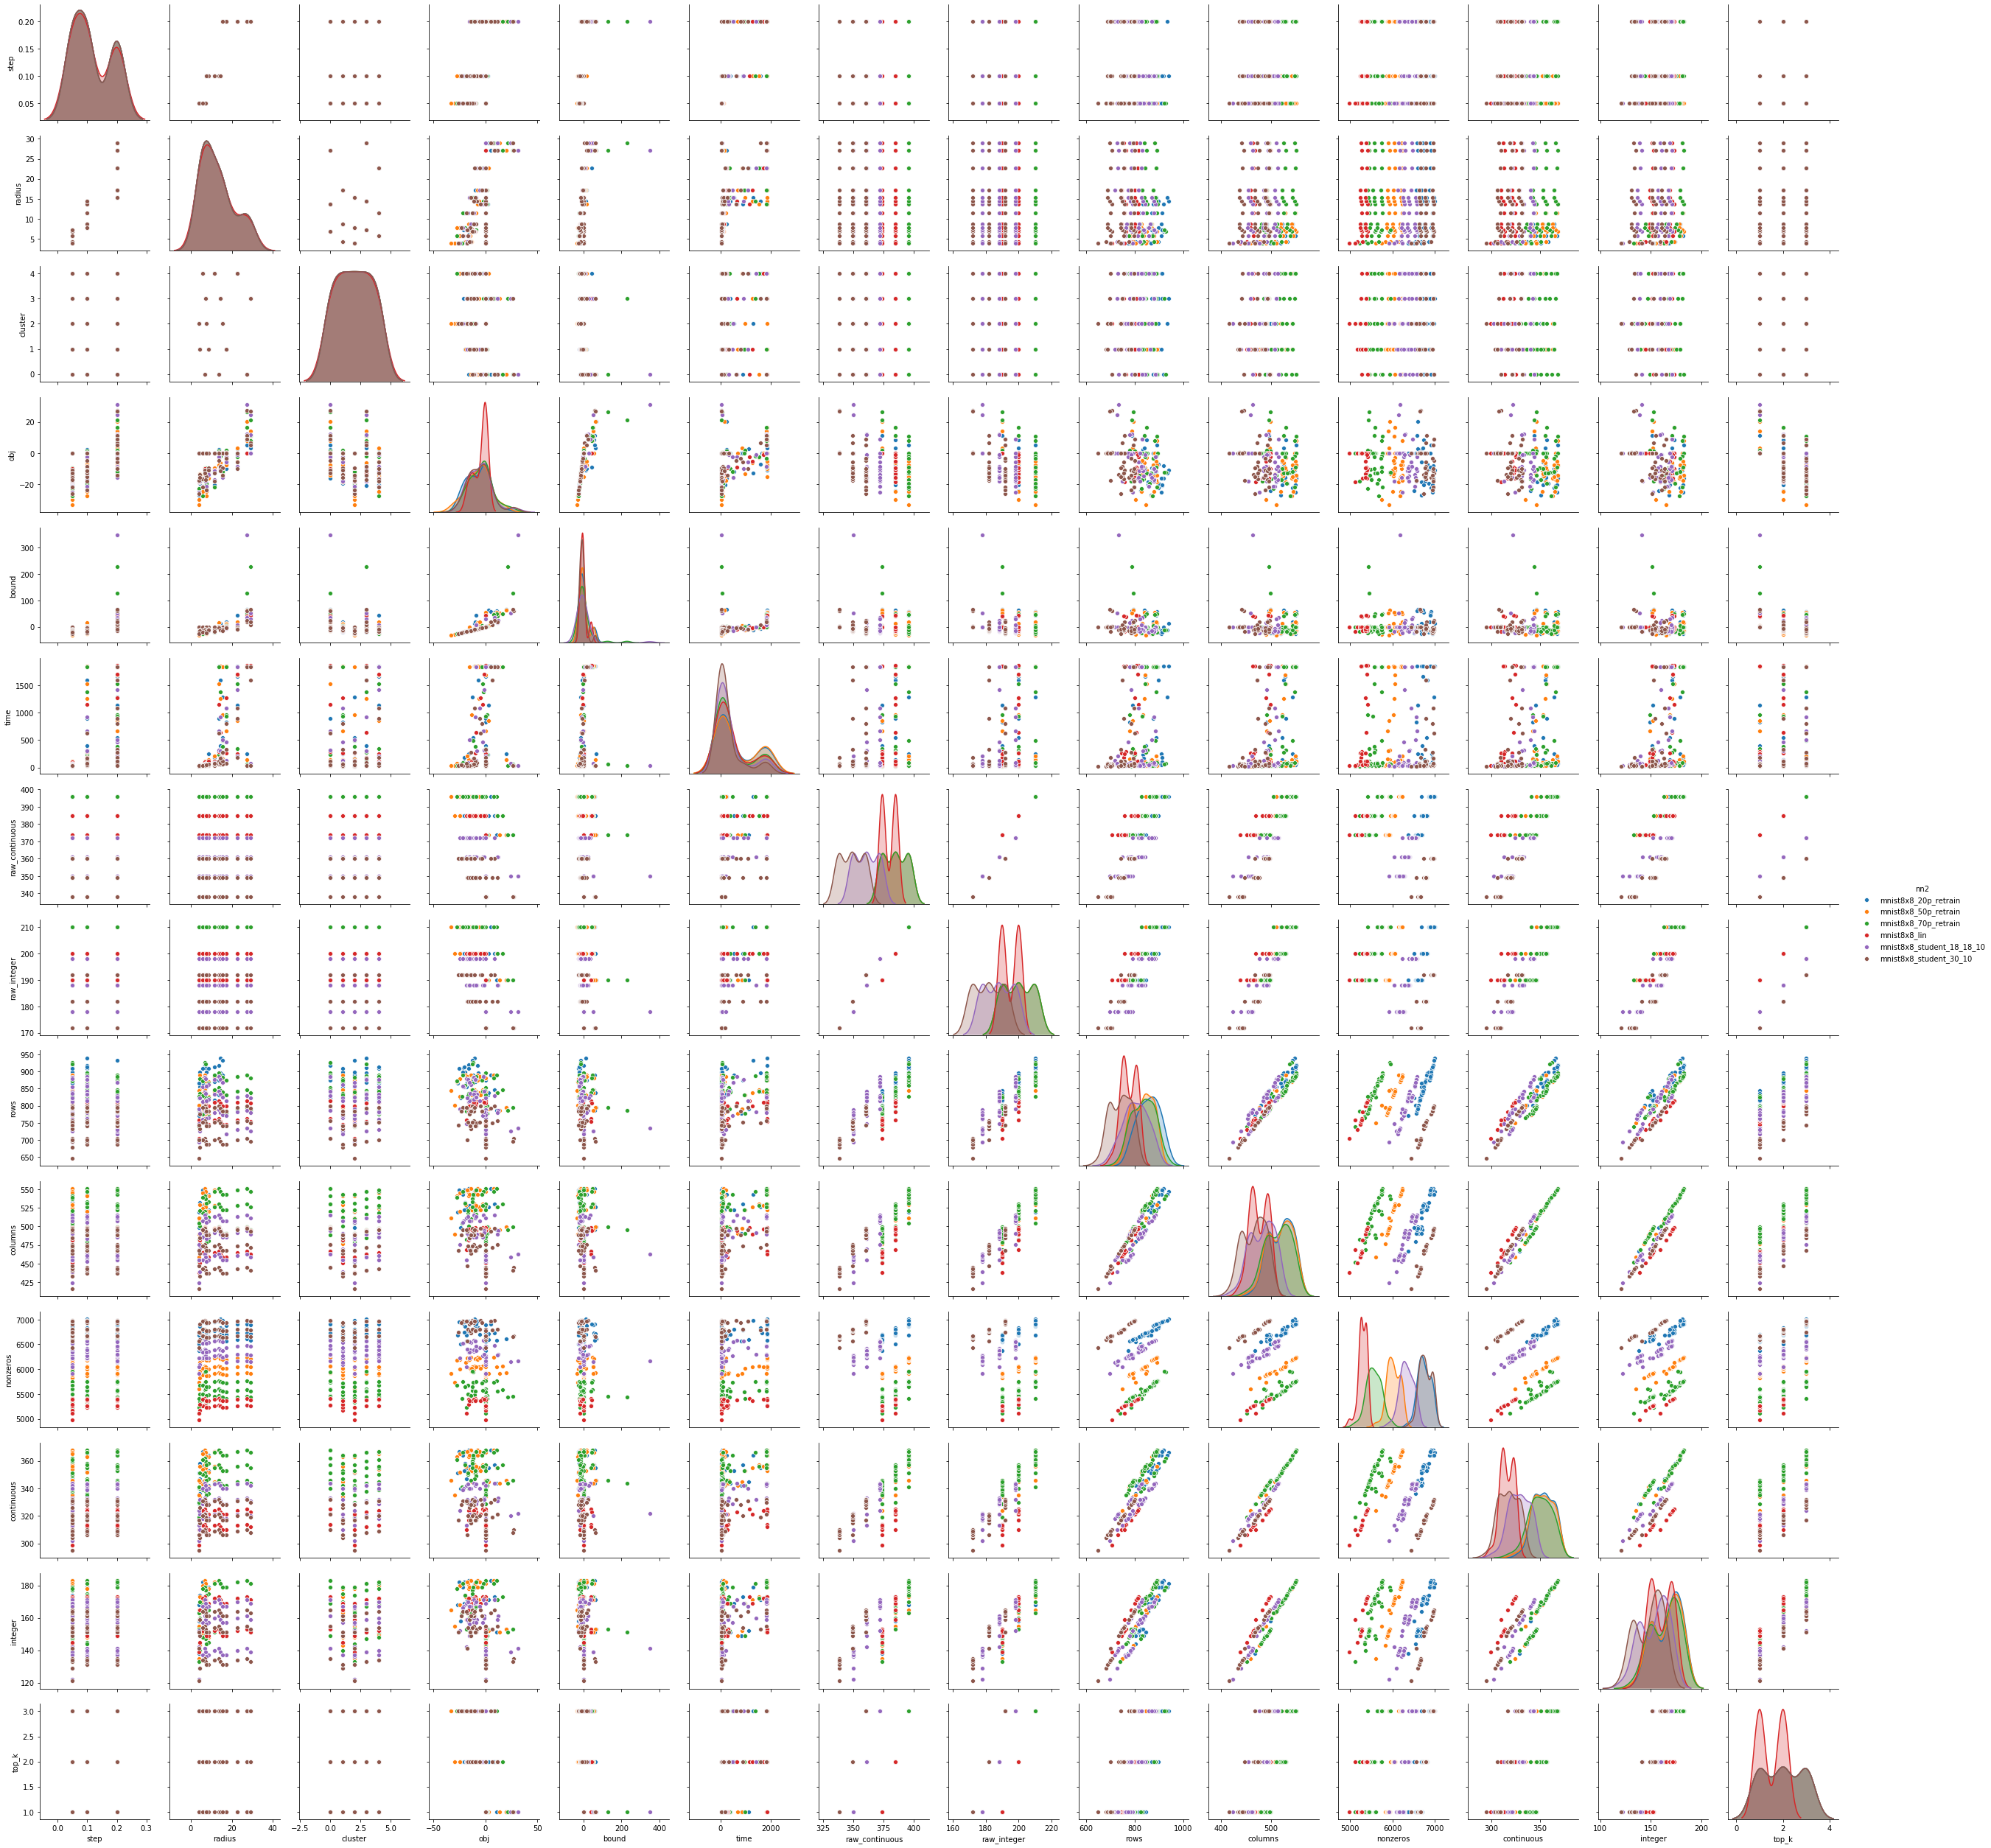

In [10]:
sns.pairplot(df_plot[df_plot['nn1'] == 'mnist8x8_lin'], vars=['step', 'radius', 'cluster', 'obj', 'bound', 'time', 'raw_continuous', 'raw_integer', 
                            'rows', 'columns', 'nonzeros', 'continuous', 'integer', 'top_k'], hue='nn2')

In [52]:
df_plot[(df_plot['nn1'] == 'mnist8x8_lin') & (df_plot['obj'] > 0.1)].drop(['logfile', 'raw_continuous', 
                                                                           'raw_integer', 'rows', 'columns', 
                                                                           'nonzeros', 'continuous', 
                                                                           'integer'], axis=1).sort_values(['cluster', 'step', 'testname'])

,testname,cluster,step,radius,obj,bound,time,inputfile,nn1,nn2,top_k
230,mnist8x8_lin_vs_mnist8x8_20p_retrain_one_hot_p...,0,0.1,13.6,2.321458,2.321458,239.331814,FinalEvaluation/FixedRadius/inputs/mnist8x8_li...,mnist8x8_lin,mnist8x8_20p_retrain,1
320,mnist8x8_lin_vs_mnist8x8_70p_retrain_one_hot_p...,0,0.1,13.6,1.307836,1.307836,234.379862,FinalEvaluation/FixedRadius/inputs/mnist8x8_li...,mnist8x8_lin,mnist8x8_70p_retrain,1
440,mnist8x8_lin_vs_mnist8x8_student_30_10_one_hot...,0,0.1,13.6,0.334445,0.334445,60.653396,FinalEvaluation/FixedRadius/inputs/mnist8x8_li...,mnist8x8_lin,mnist8x8_student_30_10,1
235,mnist8x8_lin_vs_mnist8x8_20p_retrain_one_hot_p...,0,0.2,27.2,20.281209,66.263096,246.116129,FinalEvaluation/FixedRadius/inputs/mnist8x8_li...,mnist8x8_lin,mnist8x8_20p_retrain,1
250,mnist8x8_lin_vs_mnist8x8_20p_retrain_one_hot_p...,0,0.2,27.2,8.370293,55.858452,1842.126452,FinalEvaluation/FixedRadius/inputs/mnist8x8_li...,mnist8x8_lin,mnist8x8_20p_retrain,2
265,mnist8x8_lin_vs_mnist8x8_20p_retrain_one_hot_p...,0,0.2,27.2,5.364934,58.550058,1843.771208,FinalEvaluation/FixedRadius/inputs/mnist8x8_li...,mnist8x8_lin,mnist8x8_20p_retrain,3
280,mnist8x8_lin_vs_mnist8x8_50p_retrain_one_hot_p...,0,0.2,27.2,20.185733,63.489711,145.225200,FinalEvaluation/FixedRadius/inputs/mnist8x8_li...,mnist8x8_lin,mnist8x8_50p_retrain,1
295,mnist8x8_lin_vs_mnist8x8_50p_retrain_one_hot_p...,0,0.2,27.2,16.421711,50.215096,1838.133280,FinalEvaluation/FixedRadius/inputs/mnist8x8_li...,mnist8x8_lin,mnist8x8_50p_retrain,2
310,mnist8x8_lin_vs_mnist8x8_50p_retrain_one_hot_p...,0,0.2,27.2,7.984195,49.571784,1837.882996,FinalEvaluation/FixedRadius/inputs/mnist8x8_li...,mnist8x8_lin,mnist8x8_50p_retrain,3
325,mnist8x8_lin_vs_mnist8x8_70p_retrain_one_hot_p...,0,0.2,27.2,26.539353,127.222506,60.483558,FinalEvaluation/FixedRadius/inputs/mnist8x8_li...,mnist8x8_lin,mnist8x8_70p_retrain,1
